In [213]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import importlib
import q_learning
importlib.reload(q_learning)
from q_learning import run
import numpy as np

### Creation of Q_learning tables

In [214]:
from itertools import product
is_training = [True]
is_slippery = [False, True]
n_episodes = [15000]
map_names = ['4x4', '8x8', '16x16', '32x32']
seed = [20]
learning_rate_as = [0.1, 0.01, 0.5]
discount_factor_gammas = [0.9, 0.95, 0.99]
epsilon = [1]
epsilon_decay_rates = [0.0001]
render = [False]
hyperparameter_grid = list(product(is_training, render, is_slippery, n_episodes, map_names, seed, learning_rate_as, discount_factor_gammas, epsilon, epsilon_decay_rates))

In [215]:
results = []
num_hyper = len(hyperparameter_grid)
print(f"Running {num_hyper} hyperparameter combinations")

for hyperparameters in hyperparameter_grid:
    is_training, render, is_slippery, n_episodes, map_name, seed, learning_rate_a, discount_factor_gamma, epsilon, epsilon_decay_rate = hyperparameters
    rewards_per_episode = run(is_training=is_training, render=render, is_slippery=is_slippery, episodes=n_episodes, map_name=map_name, seed=seed, learning_rate_a=learning_rate_a, discount_factor_g=discount_factor_gamma, epsilon=epsilon, epsilon_decay_rate=epsilon_decay_rate)
    results.append({"is_training": is_training, "render": render, "is_slippery": is_slippery, "n_episodes": n_episodes, "map_name": map_name, "seed": seed, "learning_rate_a": learning_rate_a, "discount_factor_gamma": discount_factor_gamma, "epsilon": epsilon, "epsilon_decay_rate": epsilon_decay_rate, "rewards_per_episode": rewards_per_episode})
    print(f"{len(results)/num_hyper*100}% done")
    
df = pd.DataFrame(results)

Running 36 hyperparameter combinations
2.7777777777777777% done
5.555555555555555% done
8.333333333333332% done
11.11111111111111% done
13.88888888888889% done
16.666666666666664% done
19.444444444444446% done
22.22222222222222% done
25.0% done
27.77777777777778% done
30.555555555555557% done
33.33333333333333% done
36.11111111111111% done
38.88888888888889% done
41.66666666666667% done
44.44444444444444% done
47.22222222222222% done
50.0% done
52.77777777777778% done
55.55555555555556% done
58.333333333333336% done
61.111111111111114% done
63.888888888888886% done
66.66666666666666% done
69.44444444444444% done
72.22222222222221% done
75.0% done
77.77777777777779% done
80.55555555555556% done
83.33333333333334% done
86.11111111111111% done
88.88888888888889% done
91.66666666666666% done
94.44444444444444% done
97.22222222222221% done
100.0% done


In [216]:
def calc_sum_rewards(rewards_per_episode):
    sum_rewards = np.zeros(rewards_per_episode.shape[0])
    for t in range(rewards_per_episode.shape[0]):
        sum_rewards[t] = np.sum(rewards_per_episode[max(0, t-100):(t+1)])
        
    return sum_rewards

In [217]:
df['sum_rewards'] = df['rewards_per_episode'].apply(calc_sum_rewards)
display(df.head())

,is_training,render,is_slippery,n_episodes,map_name,seed,learning_rate_a,discount_factor_gamma,epsilon,epsilon_decay_rate,rewards_per_episode,sum_rewards
0,True,False,False,15000,4x4,20,0.10,0.90,1,0.0001,"[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 2.0, 3.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, ..."
1,True,False,False,15000,4x4,20,0.10,0.95,1,0.0001,"[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 1.0, 2.0, 3.0, 3.0, 3.0, 4.0, ..."
2,True,False,False,15000,4x4,20,0.10,0.99,1,0.0001,"[1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 2.0, 3.0, 3.0, 3.0, 4.0, 5.0, ..."
3,True,False,False,15000,4x4,20,0.01,0.90,1,0.0001,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 2.0, 2.0, ..."
4,True,False,False,15000,4x4,20,0.01,0.95,1,0.0001,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, ..."


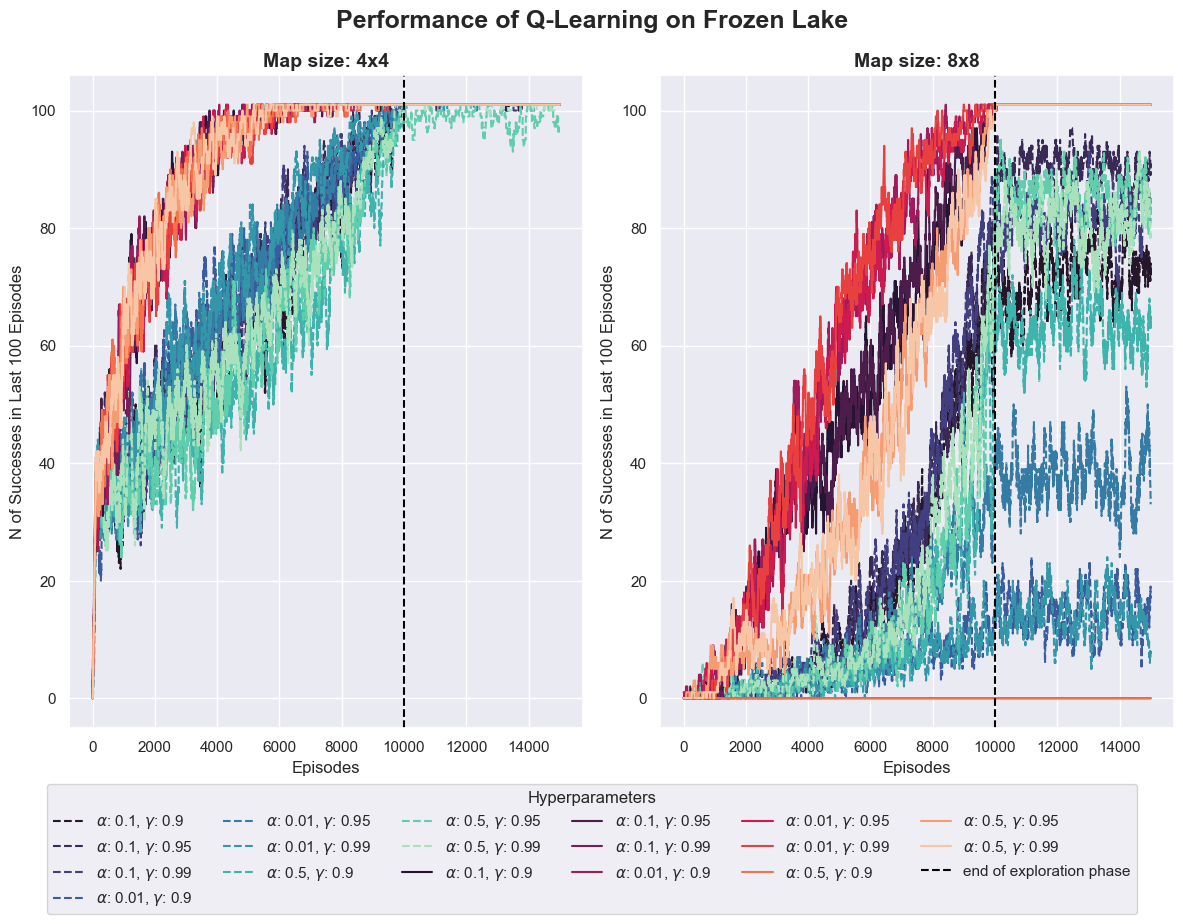

In [218]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_results(df, map_names):
    num_plots = len(map_names)
    fig, axes = plt.subplots(num_plots//2, 2, figsize=(12,8), squeeze=True)
    axes = axes.flatten()  # Flatten the 2D array of subplots to a 1D array
    
    for i, map_name in enumerate(map_names):
        df_map = df[df['map_name'] == map_name]
        ax = axes[i]  # Get the specific subplot for the current map_name
        
        df_slippery = df_map[df_map['is_slippery'] == True]
        colors_slippery = sns.color_palette("mako", len(df_slippery)).as_hex()
        ii = 0
        for index, row in df_slippery.iterrows():
            alpha = row['learning_rate_a']
            gamma = row['discount_factor_gamma']
            label = f"$\\alpha$: {alpha}, $\\gamma$: {gamma}"
            ax.plot(np.arange(len(row['sum_rewards'])), row['sum_rewards'], label=label, linestyle="dashed", color=colors_slippery[ii])
            ii += 1
            
        df_solid = df_map[df_map['is_slippery'] == False]
        colors_solid = sns.color_palette("rocket", len(df_solid)).as_hex()
        ii = 0
        for index, row in df_solid.iterrows():
            alpha = row['learning_rate_a']
            gamma = row['discount_factor_gamma']
            label = f"$\\alpha$: {alpha}, $\\gamma$: {gamma}"
            ax.plot(np.arange(len(row['sum_rewards'])), row['sum_rewards'], label=label, linestyle="solid", color=colors_solid[ii])
            ii += 1
        # Plot a vertical line at 100 episodes
        ax.axvline(x=10000, color='black', linestyle='--', label="end of exploration phase")
        ax.set_xlabel('Episodes')
        ax.set_ylabel('N of Successes in Last 100 Episodes')
        ax.set_title(f'Map size: {map_name}', fontsize=14, fontweight="bold")
        ax.grid(True)
        
    # Display a single legend for all subplots
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.16), ncol=len(labels)//3, title='Hyperparameters')
    fig.suptitle('Performance of Q-Learning on Frozen Lake', fontsize=18, fontweight="bold")
    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.savefig('./plots/frozen_lake_rewards_all_maps.png')  # Save the plot
    plt.show()

# Assuming 'df' is your DataFrame containing the data
map_names = df['map_name'].unique()  # Assuming this gives you all unique map names
plot_results(df, map_names)